# Analysis of the waveform of detected Neural Spikes


In [15]:
import sys
import os
import time
from importlib.util import spec_from_loader, module_from_spec
from importlib.machinery import SourceFileLoader
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [16]:
sys.path.insert(0, os.path.join(os.getcwd(), "../.."))

In [17]:
from utility import signal_process

In [18]:
# Import encode
spec = spec_from_loader("encode", SourceFileLoader("encode", "../../encode"))
encode = module_from_spec(spec)
spec.loader.exec_module(encode)

In [19]:
# Import decode
spec = spec_from_loader("decode", SourceFileLoader("decode", "../../decode"))
decode = module_from_spec(spec)
spec.loader.exec_module(decode)

In [20]:
file = "../../data/0ab237b7-fb12-4687-afed-8d1e2070d621.wav"
compressed_file_path = "../../data/0ab237b7-fb12-4687-afed-8d1e2070d621.wav.brainwire"
decompressed_file_path = "../../data/0ab237b7-fb12-4687-afed-8d1e2070d621.wav.copy"

In [21]:
start_time = time.time_ns()
sample_rate, input_wav, compressed_file_path = encode.read_file(
    file, compressed_file_path
)
stop_time = time.time_ns()
signal_process.print_time_each_function_takes_to_complete_processing(
    start_time=start_time,
    stop_time=stop_time,
    executed_line="encode.read_file(",
)
start_time = time.time_ns()
filtered_data_bandpass = signal_process.preprocess_signal(
    raw_neural_signal=input_wav,
    sample_rate=sample_rate,
)
stop_time = time.time_ns()
signal_process.print_time_each_function_takes_to_complete_processing(
    start_time=start_time,
    stop_time=stop_time,
    executed_line="signal_process.preprocess_signal(",
)
start_time = time.time_ns()
# spike_train_time_index_list, neural_data = signal_process.detect_neural_spikes(
#     neural_data=filtered_data_bandpass, single_spike_detection=False
# )
stop_time = time.time_ns()
signal_process.print_time_each_function_takes_to_complete_processing(
    start_time=start_time,
    stop_time=stop_time,
    executed_line="signal_process.detect_neural_spikes(",
)
start_time = time.time_ns()
# encoded_data, neural_spike_l = signal_process.create_encoded_data(
#     sample_rate=sample_rate,
#     number_of_samples=len(filtered_data_bandpass),
#     spike_train_time_index_list=spike_train_time_index_list,
#     neural_data=filtered_data_bandpass,
# )
stop_time = time.time_ns()
signal_process.print_time_each_function_takes_to_complete_processing(
    start_time=start_time,
    stop_time=stop_time,
    executed_line="signal_process.create_encoded_data(",
)

file: ../../data/0ab237b7-fb12-4687-afed-8d1e2070d621.wav
compressed_file_path: ../../data/0ab237b7-fb12-4687-afed-8d1e2070d621.wav.brainwire

Executed Line: encode.read_file(...
Time Δ Nanoseconds: 739000
Time Δ Microseconds: 739.0
Time Δ Milliseconds: 0.739
Time Δ Seconds: 0.000739



Executed Line: signal_process.preprocess_signal(...
Time Δ Nanoseconds: 15693000
Time Δ Microseconds: 15693.0
Time Δ Milliseconds: 15.693
Time Δ Seconds: 0.015693



Executed Line: signal_process.detect_neural_spikes(...
Time Δ Nanoseconds: 3465525000
Time Δ Microseconds: 3465525.0
Time Δ Milliseconds: 3465.525
Time Δ Seconds: 3.465525



Executed Line: signal_process.create_encoded_data(...
Time Δ Nanoseconds: 3041000
Time Δ Microseconds: 3041.0
Time Δ Milliseconds: 3.041
Time Δ Seconds: 0.003041




In [22]:
len(neural_spike_l)

NameError: name 'neural_spike_l' is not defined

In [97]:
spike_len_l = []
for spike in neural_spike_l:
    spike_len_l.append(len(spike))
spike_len_l = np.array(spike_len_l)
print(f"Mean Spike Length: {spike_len_l.mean()}")
print(f"Min Spike Length: {spike_len_l.min()}")
print(f"Max Spike Length: {spike_len_l.max()}")

Mean Spike Length: 13.230105206366334
Min Spike Length: 6
Max Spike Length: 39


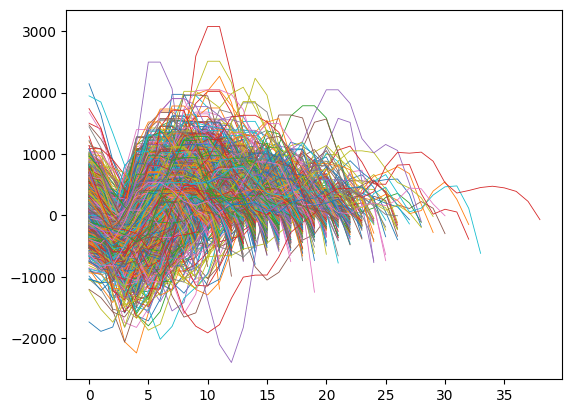

In [98]:
for spike in neural_spike_l:
    plt.plot(spike, linewidth=0.6)

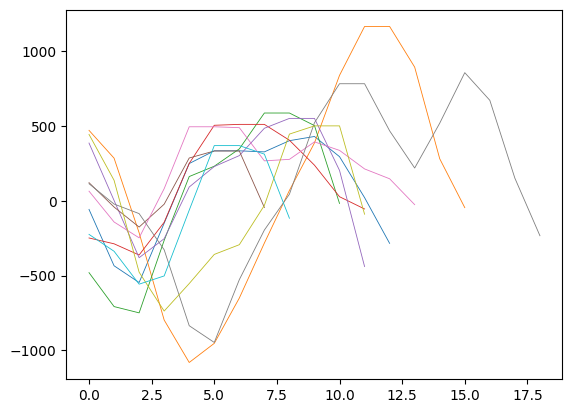

In [99]:
for spike_index in range(0, len(neural_spike_l[10:20])):
    plt.plot(neural_spike_l[spike_index], linewidth=0.6)